# Validation of performance for Zero- and Few-Shot extraction of seizure freedom

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu
from statannotations.Annotator import Annotator
import statsmodels
from statsmodels.stats.descriptivestats import sign_test
# import scikit_posthocs

In [2]:
def summary_stats(vals):
    med = np.median(vals)
    IQR = np.percentile(vals,[25,75])
    print(f"Median: {med}, IQR: {IQR}")

## Prompt engineering performance

### Accuracy

In [3]:
one_word = [64,54,58,68,62,58,61,65,65,60,64,49,68,62,57]
reasoning = [46,50,56,48,49,58,48,54,54,50,47,53,43,48,52]
prompt_engineered = [62,70,65,69,61,54,61,71,63,58,62,65,62,67,62]
date_trick = [79,72,82,74,79,74,80,73,70,70,74,80,75,80,73]
neuro = [79,73,78,75,82,68,85,68,76,75,70,83,74,83,78]
gen = [48,46,54,47,49,50,46,52,56,48,47,50,52,52,47]

In [4]:
summary_stats(one_word)
summary_stats(reasoning)
summary_stats(prompt_engineered)
summary_stats(date_trick)
summary_stats(neuro)
summary_stats(gen)

Median: 62.0, IQR: [58.  64.5]
Median: 50.0, IQR: [48.  53.5]
Median: 62.0, IQR: [61.5 66. ]
Median: 74.0, IQR: [73.  79.5]
Median: 76.0, IQR: [73.5 80.5]
Median: 49.0, IQR: [47. 52.]


### Inference Time

In [5]:
one_word_times = np.array([18.31, 27.61, 28.67, 21.05, 24.29, 27.59, 24.01, 23.65, 23.24, 25.40, 19.98, 22.35, 25.65,
 24.4, 22.6]) + 842
reasoning_times = np.array([25.37, 22.49, 25.74, 27.22, 20.83, 21.28, 22.6, 27.73, 18.35, 24.71, 21.75, 24.85, 25.39, 25.26, 27.71]) + 3549
temporal_times = np.array([20.07, 22.99, 26.29, 24.34, 25.13, 22.4, 23.95, 22.54, 19.9, 22.84, 24.79, 24.64, 26.39, 28.72, 22.99]) + 5201
date_trick_times = np.array([24.61, 19.22, 21.16, 25.06, 25.56, 23.23, 25.44, 21.04, 19.65, 27.75, 22.32, 25.47, 23.7, 24.7, 27.64])+ 3420

In [6]:
summary_stats(one_word_times)
summary_stats(reasoning_times)
summary_stats(temporal_times)
summary_stats(date_trick_times)

Median: 866.01, IQR: [864.475 867.525]
Median: 3573.85, IQR: [3571.12  3574.565]
Median: 5224.95, IQR: [5223.69 5225.96]
Median: 3444.61, IQR: [3441.74  3445.455]


## Benchmark model performance

### Epileptologist notes

In [7]:
data_reduction = np.array([
        [0.8200,	0.8133,	0.8467,	0.8100,	0.8500,	0.7867,	0.7567,	0.7700,	0.7100,	0.6967,	0.2100],
        [0.8633,	0.8333,	0.8267,	0.8567,	0.8200,	0.8233,	0.7900,	0.7467,	0.7300,	0.6900,	0.2500],
        [0.8433,	0.8300,	0.8267,	0.8067,	0.7800,	0.7500,	0.7700,	0.7800,	0.7233,	0.7200,	0.2967],
        [0.8367,	0.8300,	0.8333,	0.7867,	0.8100,	0.7800,	0.7367,	0.7633,	0.7274,	0.6900,	0.2867],
        [0.8267,	0.8400,	0.7833,	0.8167,	0.8033,	0.7500,	0.7400,	0.7267,	0.7267,	0.6700,	0.2267],
        ])*100
dataset_sizes = np.repeat(np.linspace(700,0,11,True),5,axis=0)

In [8]:
summary_stats(data_reduction[:,0])
summary_stats(data_reduction[:,-1])

Median: 83.67, IQR: [82.67 84.33]
Median: 25.0, IQR: [22.67 28.67]


### Generalization

In [9]:
bert_gen = [51,52,51,58,57]
bert_neuro = [61,70,67,70,65]
bert_time = [32.9, 23.44, 19.32, 24.66, 18.97]

In [10]:
summary_stats(bert_gen)
summary_stats(bert_neuro)
summary_stats(bert_time)

Median: 52.0, IQR: [51. 57.]
Median: 67.0, IQR: [65. 70.]
Median: 23.44, IQR: [19.32 24.66]


## Generalization performance (Figure 4)

In [11]:
all_accs = {"Model":[],
           "Note":[],
           "Accuracy":[]}
for i in range(len(bert_gen)):
    all_accs['Model'].append("Bio+ClinicalBERT")
    all_accs['Note'].append("Generalist")
    all_accs['Accuracy'].append(bert_gen[i])
for i in range(len(bert_neuro)):
    all_accs['Model'].append("Bio+ClinicalBERT")
    all_accs['Note'].append("Neurologist")
    all_accs['Accuracy'].append(bert_neuro[i])
for i in range(len(neuro)):
    all_accs['Model'].append("Llama2 13B")
    all_accs['Note'].append("Neurologist")
    all_accs['Accuracy'].append(neuro[i])
for i in range(len(gen)):
    all_accs['Model'].append("Llama2 13B")
    all_accs['Note'].append("Generalist")
    all_accs['Accuracy'].append(gen[i])
for i in range(len(date_trick)):
    all_accs['Model'].append("Llama2 13B")
    all_accs['Note'].append("Epileptologist")
    all_accs['Accuracy'].append(date_trick[i])
for i in range(data_reduction.shape[0]):
    all_accs['Model'].append("Bio+ClinicalBERT")
    all_accs['Note'].append("Epileptologist")
    all_accs['Accuracy'].append(data_reduction[i,0])

In [12]:
df = pd.DataFrame(all_accs)
box_pairs=[(("Generalist", "Bio+ClinicalBERT"),("Generalist", "Llama2 13B")),
           (("Neurologist", "Bio+ClinicalBERT"),("Neurologist","Llama2 13B")),
           (("Epileptologist", "Bio+ClinicalBERT"),("Epileptologist","Llama2 13B")),
           (("Neurologist","Llama2 13B"),("Epileptologist","Llama2 13B"))]

### Comparison against benchmark models

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Neurologist_Bio+ClinicalBERT vs. Neurologist_Llama2 13B: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.085e-03 U_stat=5.000e+00
Generalist_Bio+ClinicalBERT vs. Generalist_Llama2 13B: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.890e-02 (ns) U_stat=6.150e+01
Epileptologist_Bio+ClinicalBERT vs. Epileptologist_Llama2 13B: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.372e-03 U_stat=7.450e+01
Neurologist_Llama2 13B vs. Epileptologist_Llama2 13B: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.173e-01 U_stat=1.250e+02
gen: MannwhitneyuResult(statistic=13.5, pvalue=0.03889733784958926), neuro: MannwhitneyuResult(statistic=70.0, pvalue=0.005084552102763393), epi: Mann

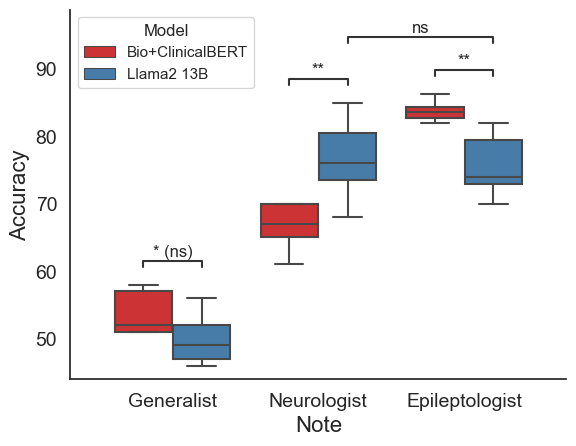

In [13]:
order = ['Generalist','Neurologist','Epileptologist']
hue_order = ['Bio+ClinicalBERT','Llama2 13B']
sns.set(rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('white')
ax = sns.boxplot(data = df,
                 x='Note',
                 hue='Model',
                 y='Accuracy',
                 order=order,
                 hue_order=hue_order,
                 palette={"Bio+ClinicalBERT": np.array([228,26,28])/255,'Llama2 13B': np.array([55,126,184])/255}
                )
sns.despine()
# annot = Annotator(ax,box_pairs,data=df,x='Note',hue='Model')
annot = Annotator(ax,box_pairs,data=df,x='Note',hue='Model',y='Accuracy',order = order, hue_order = hue_order)
annot.configure(test='Mann-Whitney',text_format='star',loc='inside',comparisons_correction='Benjamini-Hochberg')
annot.apply_and_annotate()
print(f"gen: {mannwhitneyu(gen,bert_gen)}, neuro: {mannwhitneyu(neuro,bert_neuro)}, epi: {mannwhitneyu(date_trick,data_reduction[:,0])}")
plt.savefig('gpt_figures/generalization.pdf',format='pdf',transparent=True,bbox_inches='tight')
all_ps = []
all_ps.append(mannwhitneyu(gen,bert_gen).pvalue); all_ps.append(mannwhitneyu(neuro,bert_neuro).pvalue)
all_ps.append(mannwhitneyu(date_trick,data_reduction[:,0]).pvalue)
all_ps.append(mannwhitneyu(neuro,date_trick).pvalue)
print(all_ps)
corrected = statsmodels.stats.multitest.fdrcorrection(all_ps)
print("\n BH p-value Correction\n",corrected)

### Testing against majority class null models

In [14]:
base_ps = []
base_ps.append(wilcoxon(np.array(gen)-35).pvalue)
base_ps.append(wilcoxon(np.array(neuro)-47).pvalue)
statsmodels.stats.multitest.fdrcorrection(base_ps)

(array([ True,  True]), array([6.10351562e-05, 6.10351562e-05]))

## Data reduction (Figure 3)

In [15]:
reduction_y = list(data_reduction.T.flatten()) + date_trick
reduction_x = list(dataset_sizes.flatten()) + [0.]*len(date_trick)
reduction_hue = ["Bio+ClinicalBERT"]*len(data_reduction.T.flatten()) + ["Llama2 13B"]*len(date_trick)

MannwhitneyuResult(statistic=0.5, pvalue=0.0013721220184746462)
MannwhitneyuResult(statistic=1.0, pvalue=0.0015961454370881862)
MannwhitneyuResult(statistic=6.0, pvalue=0.006563970735353795)
MannwhitneyuResult(statistic=9.0, pvalue=0.014119432892015154)
MannwhitneyuResult(statistic=8.5, pvalue=0.012455025012689178)
MannwhitneyuResult(statistic=25.0, pvalue=0.2921563484656642)
MannwhitneyuResult(statistic=35.5, pvalue=0.8950424915554748)
MannwhitneyuResult(statistic=37.0, pvalue=1.0)
MannwhitneyuResult(statistic=60.0, pvalue=0.05354431288314403)
MannwhitneyuResult(statistic=72.5, pvalue=0.0024762135442437344)
MannwhitneyuResult(statistic=75.0, pvalue=0.0011825173370041972)

 BH p-value Correction
 (array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True]), array([0.00585253, 0.00585253, 0.01444074, 0.02218768, 0.02218768,
       0.35707998, 0.98454674, 1.        , 0.07362343, 0.00680959,
       0.00585253]))


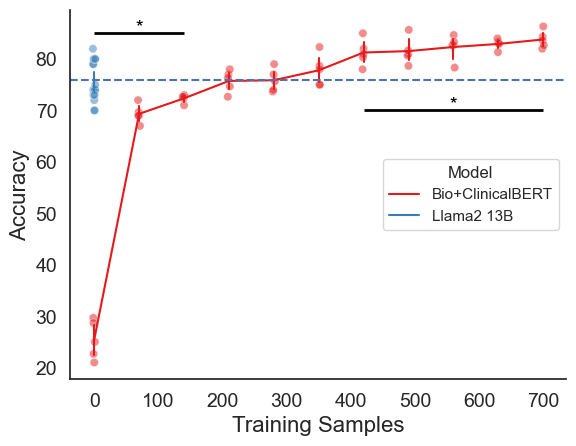

In [16]:
sns.set(rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('white')
jitter=2
ax = sns.scatterplot(x = reduction_x + np.random.uniform(-jitter,jitter,size=len(reduction_x)), y = reduction_y, hue = reduction_hue,
                     palette={"Bio+ClinicalBERT": np.array([228,26,28])/255,'Llama2 13B': np.array([55,126,184])/255},
                    alpha=.5,legend=False)
ax = sns.lineplot(ax=ax,x=reduction_x,y=reduction_y,hue=reduction_hue,err_style='bars',
                  palette={"Bio+ClinicalBERT": np.array([228,26,28])/255,'Llama2 13B': np.array([55,126,184])/255},
                 linewidth=1.5)

plt.legend(title='Model')
# plt.scatter([0]*len(date_trick),date_trick,color=np.array([55,126,184])/255)
sns.move_legend(ax,'center right')
plt.axhline(76,linestyle='--')
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
sns.despine()
ps = []
for i in range(data_reduction.shape[1]):
    result = mannwhitneyu(date_trick,data_reduction[:,i],alternative='two-sided')
    ps.append(result.pvalue)
    print(result)
corrected = statsmodels.stats.multitest.fdrcorrection(ps)
print("\n BH p-value Correction\n",corrected)

# Code for drawing horizontal lines
plt.hlines(85,0,140,color='black',linewidth=2)
asterisk_x = (0+140)/2  # Adjust this value for the asterisk's horizontal position
asterisk_y = 86   # Adjust this value for the asterisk's vertical position
# # Plot the asterisk above the black line
asterisk_size = 14  # Adjust this value for the size of the asterisk
ax.text(asterisk_x, asterisk_y, '*', fontsize=asterisk_size, ha='center', va='center', color='black')

plt.hlines(70,420,700,color='black',linewidth=2)
asterisk_x = (420+700)/2  # Adjust this value for the asterisk's horizontal position
asterisk_y = 71   # Adjust this value for the asterisk's vertical position
# Plot the asterisk above the black line
asterisk_size = 14  # Adjust this value for the size of the asterisk
ax.text(asterisk_x, asterisk_y, '*', fontsize=asterisk_size, ha='center', va='center', color='black')

plt.savefig('gpt_figures/training_data.pdf',format='pdf',transparent=True,bbox_inches='tight')

In [17]:
[[55,126,184]]*3

[[55, 126, 184], [55, 126, 184], [55, 126, 184]]

## Prompt Engineering Performance (Figure 1)

only insignificant difference is in between one word and prompt engineered


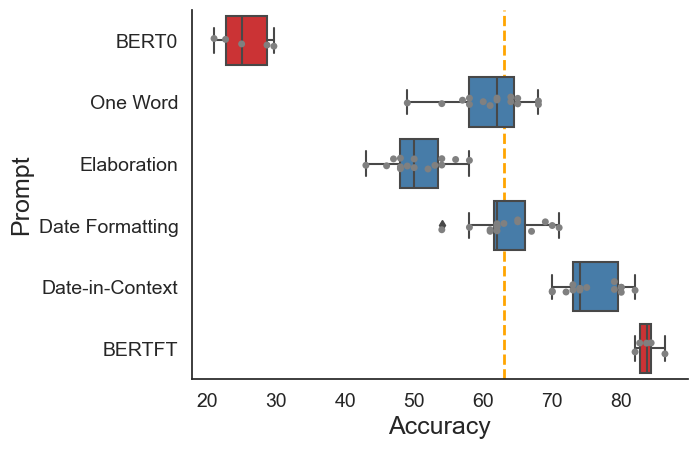

In [18]:
bert0 = np.empty((len(one_word),)); bert0.fill(np.nan)
bertft = np.empty((len(one_word),)); bertft.fill(np.nan)
bert0[:len(data_reduction)] = data_reduction[:,-1]
bertft[:len(data_reduction)] = data_reduction[:,0]
prompt_dic = {"BERT0": bert0,"One Word":one_word,"Elaboration":reasoning,"Date Formatting":prompt_engineered,"Date-in-Context":date_trick,"BERTFT": bertft}
prompt_df = pd.DataFrame(prompt_dic).melt()
prompt_df.columns = ["Prompt","Accuracy"]

sns.set(rc={'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('white')
# plt.xticks(rotation=30)
# np.array([55,126,184])/255
cols = [np.array([228,26,28])/255,np.array([55,126,184])/255,np.array([55,126,184])/255,np.array([55,126,184])/255,np.array([55,126,184])/255,np.array([228,26,28])/255]
col_dict = {key: list(cols[i]) for i,key in enumerate(prompt_dic.keys())}
# print(col_dict)
ax = sns.boxplot(data=prompt_df,x='Accuracy',y='Prompt',palette=col_dict)
sns.stripplot(data=prompt_df,x='Accuracy',y='Prompt',color='gray',alpha=1,ax=ax)
plt.axvline(63,linestyle='--',color='orange',linewidth=2,zorder=-1)

sns.despine()

# from itertools import combinations
# annot = Annotator(ax,list(combinations(list(prompt_df.Prompt.unique()),2)),data=prompt_df,x='Accuracy',y='Prompt',orient='h')
# annot.configure(test='Mann-Whitney',text_format='star',loc='outside',comparisons_correction='Benjamini-Hochberg')
# annot.apply_and_annotate()
print("only insignificant difference is in between one word and prompt engineered")
plt.savefig('gpt_figures/prompt_engineering.pdf',format='pdf',transparent=True,bbox_inches='tight')

### Testing against majoirty class classifier

In [19]:
ps = []
for key in prompt_dic.keys():
    print(key)
    arr = prompt_dic[key]
    print(sign_test(arr,62))
    res = wilcoxon(np.array(arr)-62)
    print(res)
    if res.pvalue:
        ps.append(res.pvalue)
print(ps)
# ps.append(wilcoxon(data_reduction[:,-1]).pvalue)
# ps.append(wilcoxon(data_reduction[:,0]).pvalue)
print(statsmodels.stats.multitest.fdrcorrection(ps[:-2]))

BERT0
(-2.5, 0.0625)
WilcoxonResult(statistic=nan, pvalue=nan)
One Word
(-0.5, 1.0)
WilcoxonResult(statistic=38.0, pvalue=0.5993983011977562)
Elaboration
(-7.5, 6.103515625e-05)
WilcoxonResult(statistic=0.0, pvalue=6.103515625e-05)
Date Formatting
(1.5, 0.548828125)
WilcoxonResult(statistic=19.5, pvalue=0.22863963633602935)
Date-in-Context
(7.5, 6.103515625e-05)
WilcoxonResult(statistic=0.0, pvalue=6.103515625e-05)
BERTFT
(2.5, 0.0625)
WilcoxonResult(statistic=nan, pvalue=nan)
[nan, 0.5993983011977562, 6.103515625e-05, 0.22863963633602935, 6.103515625e-05, nan]
(array([False, False,  True, False]), array([nan, nan, nan, nan]))


/Users/wojemann/Documents/CNT/NLP/nlp_env/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Inference times (Table 2)

In [20]:
one_prompt = '''<s>[INST] <<SYS>> You are a thoughtful board certified neurologist trained to answer Yes or No questions. Your job is to carefully read a patient history and answer the question: "has the patient had a known or suspected recent event?". Seizure-free status is defined as no seizure since the last visit or within the past 12 months, whichever is sooner. An event can be related to epilepsy or seizures including, but not limited to various types of seizures; auras; myoclonus; staring spells; loss of consciousness; and loss of awareness. The only possible responses you can provide are: "Yes" if they have, "No" if they have not, and "Unclear" if you do not know or are uncertain given the context. Do not provide any other context or response in addition to your one-word response. Only respond with one word. The note starts with the phrase "Note:" <</SYS>> Note: '''
reasoning_prompt = '''<s>[INST] <<SYS>> You are a thoughtful board certified neurologist trained to answer Yes or No questions. Your job is to carefully read a patient history and answer the question: "has the patient had a known or suspected recent event?". Seizure-free status is defined as no seizure since the last visit or within the past 12 months, whichever is sooner. An event can be related to epilepsy or seizures including, but not limited to various types of seizures; auras; myoclonus; staring spells; loss of consciousness; and loss of awareness. At the end of your response, make sure to include a single word either "Yes" if they have, "No" if they have not, and "Unclear" if you do not know or are uncertain given the context. The note starts with the phrase "Note:". Let's think step by step. <</SYS>> Note: '''
temporal_prompt = '''<s>[INST] <<SYS>> You are a thoughtful board certified neurologist trained to answer Yes or No questions. Your job is to carefully read a patient's medical note and answer the question "In the last twelve months, has the patient had epileptic events?". Seizure-free status is defined as no seizure since the last visit or within the past 12 months, whichever is sooner. Your answer to the question can either be "Yes" if the patient had recent seizures, "No" if the patient did not, or "Unclear" if seizure freedom is unclear from the note. An event can be related to epilepsy or seizures including, but not limited to various types of seizures; auras; myoclonus; staring spells; loss of consciousness; feeling off; and loss of awareness. If there have been any of these events within twelve months, the patient has had events; there is no need to consider uncertainty. If the patient has remained seizure free since the last visit and the last visit was more than twelve months ago, the patient is seizure free. CPS is an abbreviation for Complex Partial Seizure. A date written like MM/YY with one dash can be interpreted as month and year. A date written like MM/DD/YY can be interpreted as month, day, year. Surgeries or not taking medications are not events. The note will begin with the statement "This note was written in MM/DD/YYYY" and you will use this date to perform any calculations on how long it has been since the last seizure while also paying attention to supporting text. The note starts with the phrase "Note:". Let's think step by step. <</SYS>> Note: '''
date_trick_prompt = '''<s>[INST] <<SYS>> You are a thoughtful board-certified neurologist trained to answer Yes or No questions. Your job is to carefully read a patient's medical note and answer the question "In the last twelve months, has the patient had epileptic events?". Seizure-free status is defined as no seizure since the last visit or within the past 12 months, whichever is sooner. Your answer to the question can either be 'Yes' if the patient had recent seizures, 'No' if the patient did not, or 'Unclear' if seizure freedom is unclear from the note. An event can be related to epilepsy or seizures including, but not limited to various types of seizures; auras; myoclonus; staring spells; loss of consciousness; feeling off; and loss of awareness. If there have been any of these events within twelve months, the patient has had events; there is no need to consider uncertainty. If the patient has remained seizure-free since the last visit and the last visit was more than twelve months ago, the patient is seizure-free. CPS is an abbreviation for Complex Partial Seizure. A date written like MM/YY with one dash can be interpreted as month and year. A date written like MM/DD/YY can be interpreted as month, day, year. Surgeries or not taking medications are not events. <</SYS>> [/INST] I am a board-certified epileptologist and will closely follow those instructions. [INST] The note was written on {date_str[1]}/{date_str[2]}/{date_str[0]}.[/INST] Certainly, I'll use the provided date for calculations. Now, please provide the relevant information from the patient's medical history regarding epileptic events within the last twelve months.[INST] Note: '''

dict_keys(['BERT0', 'One Word', 'Elaboration', 'Date Formatting', 'Date-in-Context', 'BERTFT'])
0
1
2
3


<Axes: xlabel='Inference Times (s)', ylabel='Prompt'>

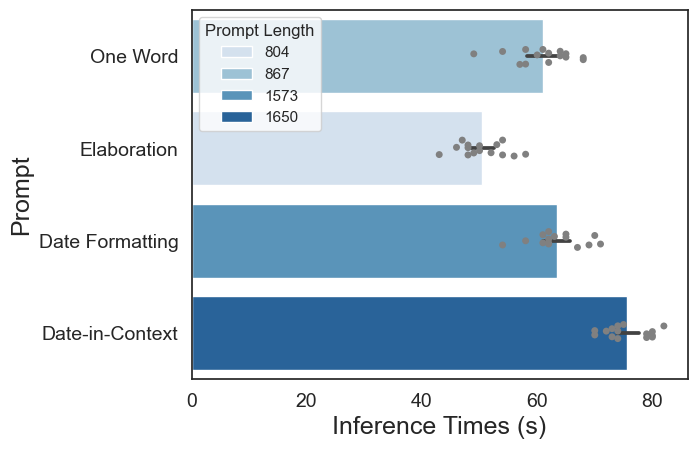

In [21]:
prompt_lens = [len(p) for p in [one_prompt,reasoning_prompt,temporal_prompt,date_trick_prompt]]
time_lengths = []
time_labels = []
time_vals = []
i = 0
print(prompt_dic.keys())
for k in prompt_dic.keys():
    if k in ['BERTFT','BERT0']:
        continue
    print(i)
    time_labels = time_labels + [k]*len(prompt_dic[k])
    time_lengths = time_lengths + [int(prompt_lens[i])]*len(prompt_dic[k])
    time_vals = time_vals + list(prompt_dic[k])
    i += 1
prompt_df = pd.DataFrame(np.vstack((time_labels,time_lengths,time_vals)).T,columns=["Prompt","Prompt Length","Inference Times (s)"])
prompt_df[["Inference Times (s)"]] = prompt_df[["Inference Times (s)"]].astype(float)
prompt_df[["Prompt Length"]] = prompt_df[["Prompt Length"]].astype(int)
ax = sns.barplot(data=prompt_df,
                 x='Inference Times (s)',
                 y = 'Prompt',
                 hue = 'Prompt Length',
                 palette = 'Blues',
                 dodge = False
               )
sns.stripplot(data=prompt_df,
                 x='Inference Times (s)',
                 y = 'Prompt',
                 color='gray',
                 ax = ax)
# from itertools import combinations
# annot = Annotator(ax,list(combinations(list(prompt_df.Prompt.unique()),2)),data=prompt_df,x='Inference Times (s)',y='Prompt',orient='h')
# annot.configure(test='Mann-Whitney',text_format='star',loc='outside',comparisons_correction='Benjamini-Hochberg')
# annot.apply_and_annotate()

In [23]:
ps = []
for key in prompt_dic.keys():
    print(key)
    arr = prompt_dic[key]
    print(sign_test(arr,62))
    res = wilcoxon(np.array(arr)-62)
    print(res)
    if res.pvalue:
        ps.append(res.pvalue)
print(ps)
# ps.append(wilcoxon(data_reduction[:,-1]).pvalue)
# ps.append(wilcoxon(data_reduction[:,0]).pvalue)
print(statsmodels.stats.multitest.fdrcorrection(ps[:-2]))


BERT0
(-2.5, 0.0625)
WilcoxonResult(statistic=nan, pvalue=nan)
One Word
(-0.5, 1.0)
WilcoxonResult(statistic=38.0, pvalue=0.5993983011977562)
Elaboration
(-7.5, 6.103515625e-05)
WilcoxonResult(statistic=0.0, pvalue=6.103515625e-05)
Date Formatting
(1.5, 0.548828125)
WilcoxonResult(statistic=19.5, pvalue=0.22863963633602935)
Date-in-Context
(7.5, 6.103515625e-05)
WilcoxonResult(statistic=0.0, pvalue=6.103515625e-05)
BERTFT
(2.5, 0.0625)
WilcoxonResult(statistic=nan, pvalue=nan)
[nan, 0.5993983011977562, 6.103515625e-05, 0.22863963633602935, 6.103515625e-05, nan]
(array([False, False,  True, False]), array([nan, nan, nan, nan]))


## Instruction fine-tuning (Figure 2 and Table 2)

In [24]:
cot = [
    [65.3, 69.6, 67.6, 72, 62.6], 
    [76, 76, 69.3, 77.3, 72.3], 
    [58, 66.7, 66, 58.3, 60.7]
]

cot_times = [[3351.9940543174744, 3422.438742876053, 3241.2374658584595, 3793.320048093796, 3933.296413898468],
            [4154.611731290817, 4356.879279613495, 5889.435248136520, 5096.525716453191, 4254.211257849024],
             [6923.971068143845, 6338.828219175339, 7185.977674007416, 6671.691372394562, 8073.505970239639]]

In [25]:
for i in cot:
    print(summary_stats(i))
for i in cot_times:
    print(summary_stats(i))

Median: 67.6, IQR: [65.3 69.6]
None
Median: 76.0, IQR: [72.3 76. ]
None
Median: 60.7, IQR: [58.3 66. ]
None
Median: 3422.438742876053, IQR: [3351.99405432 3793.32004809]
None
Median: 4356.879279613495, IQR: [4254.21125785 5096.52571645]
None
Median: 6923.971068143845, IQR: [6671.69137239 7185.97767401]
None


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 3: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.486e-03 U_stat=7.250e+01
3 vs. 5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.615e-02 (ns) U_stat=2.000e+00
5 vs. 8: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.193e-02 U_stat=2.500e+01
0 vs. 5: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.394e-01 U_stat=4.500e+01
3 vs. 8: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.524e-02 U_stat=2.100e+01
0 vs. 8: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.183e-03 U_stat=7.500e+01


/Users/wojemann/Documents/CNT/NLP/nlp_env/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


(<Axes: title={'center': 'Instruction Fine-Tuning'}, xlabel='IFT Samples', ylabel='Accuracy'>,
  <statannotations.Annotation.Annotation at 0x7f9350bc8c40>])

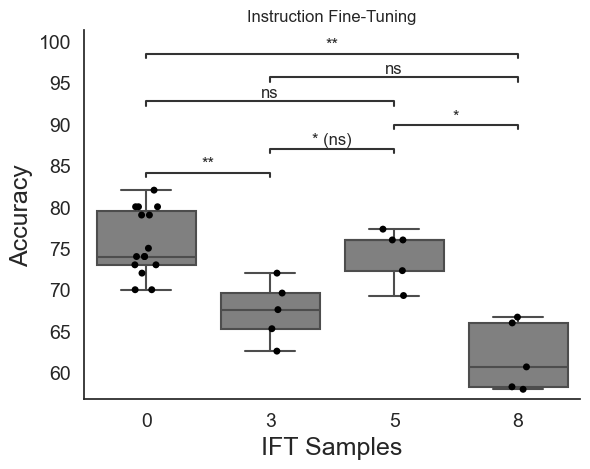

In [26]:
cot_labels = np.array(["0"]*15 + ["3"]*5 + ["5"]*5 + ["8"]*5).reshape(-1,1)
cot_accs = np.hstack((np.array(date_trick),np.array(cot).flatten())).reshape(-1,1)
data = pd.DataFrame(np.hstack((cot_labels,cot_accs)),columns=['Samples','Accuracy'])
data.Accuracy = data.Accuracy.apply(float)
ax = sns.boxplot(data = data,
            x = 'Samples',
            y = 'Accuracy',
           # palette=np.array([[239,243,255],[189,215,231],[107,174,214],[33,113,181]])/255,
            color='gray',
                 
                )
sns.stripplot(data=data,
              x='Samples',
              y='Accuracy',
              ax=ax,
             color='black')
sns.despine()
plt.xlabel('IFT Samples')
plt.ylabel('Accuracy')
plt.title('Instruction Fine-Tuning')
plt.savefig('gpt_figures/cot_performance.pdf',format='pdf',transparent=True,bbox_inches='tight')

from itertools import combinations
annot = Annotator(ax,list(combinations(list(data.Samples.unique()),2)),data=data,x='Samples',y='Accuracy')
annot.configure(test='Mann-Whitney',text_format='star',loc='inside',comparisons_correction='Benjamini-Hochberg')
annot.apply_and_annotate()

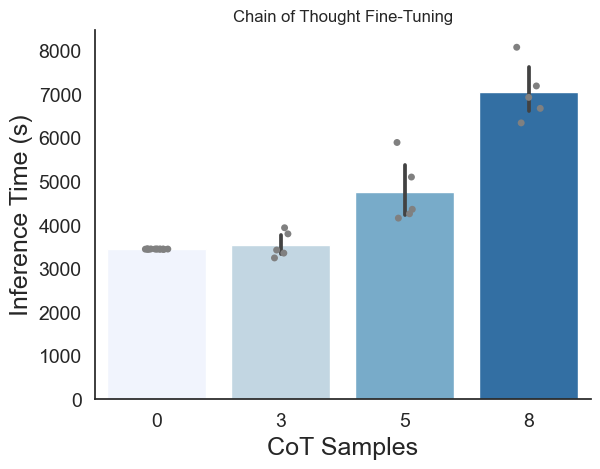

In [27]:
cot_labels = np.array(["0"]*15 + ["3"]*5 + ["5"]*5 + ["8"]*5).reshape(-1,1)
cot_accs = np.hstack((np.array(date_trick_times),np.array(cot_times).flatten())).reshape(-1,1)
data = pd.DataFrame(np.hstack((cot_labels,cot_accs)),columns=['Samples','Accuracy'])
data.Accuracy = data.Accuracy.apply(float)
ax = sns.barplot(data = data,
            x = 'Samples',
            y = 'Accuracy',
           palette=np.array([[239,243,255],[189,215,231],[107,174,214],[33,113,181]])/255)
sns.stripplot(data=data,
              x = 'Samples',
              y = 'Accuracy',
              color = 'gray',
              ax = ax)
sns.despine()
plt.xlabel('CoT Samples')
plt.ylabel('Inference Time (s)')
plt.title('Chain of Thought Fine-Tuning')
plt.savefig('gpt_figures/cot_inference_times.pdf',format='pdf',transparent=True,bbox_inches='tight')

# from itertools import combinations
# annot = Annotator(ax,list(combinations(list(data.Samples.unique()),2)),data=data,x='Samples',y='Accuracy')
# annot.configure(test='Mann-Whitney',text_format='star',loc='inside',comparisons_correction='Benjamini-Hochberg')
# annot.apply_and_annotate()